In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 



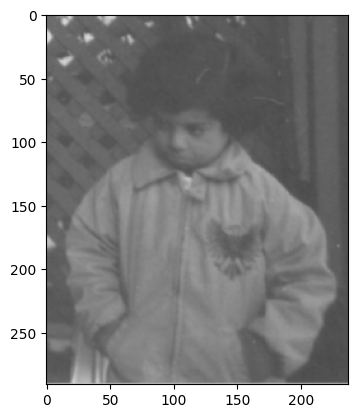

In [36]:
image = cv2.imread("pout.png")
plt.imshow(image)

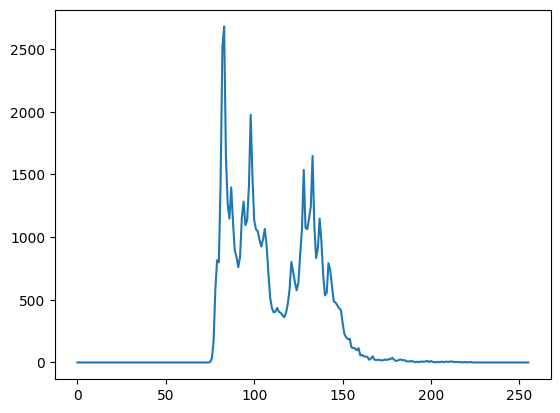

In [15]:
histogram = cv2.calcHist([image],[0],None,[256],[0,256])
plt.plot(histogram)

À l'aide de la méthode d'étirement de l'histogramme, recherchez les nouvelles valeurs de pixels de l'image et extrayez la nouvelle
image et son histogramme (min=0, max=15)

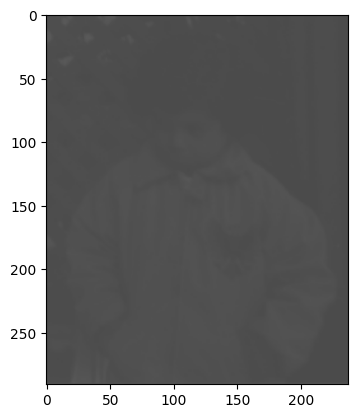

In [25]:
maxI_yeni = 15
minI_yeni = 0
maxI_eski = np.max(image)
minI_eski = np.min(image)

I_yeni = (maxI_yeni - minI_yeni)*((image - minI_eski)/(maxI_eski - minI_eski)) + minI_eski
I_yeni = np.uint8(I_yeni)
plt.imshow(I_yeni)


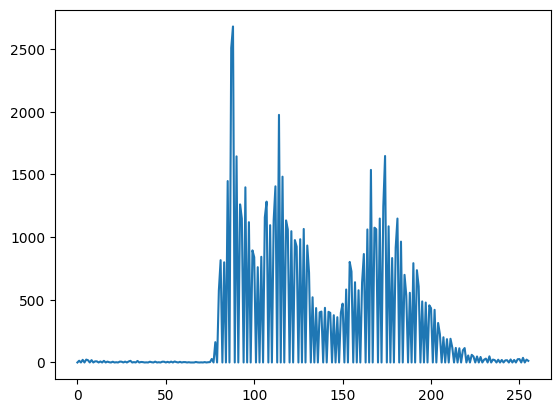

In [24]:
histogram = cv2.calcHist([I_yeni],[0],None,[256],[0,256])
plt.plot(histogram)


À l'aide de la méthode d'égalisation de l'histogramme, recherchez les nouvelles valeurs de pixels de l'image et extrayez la nouvelle
image et son histogramme

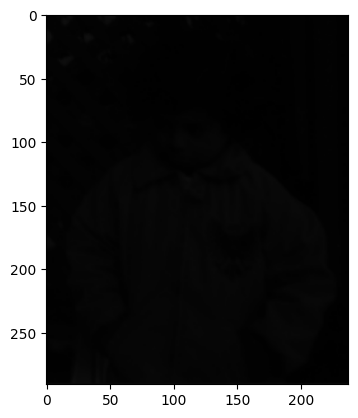

In [30]:
yeni_I = cv2.normalize(image,None,0,15,cv2.NORM_MINMAX)
plt.imshow(yeni_I)

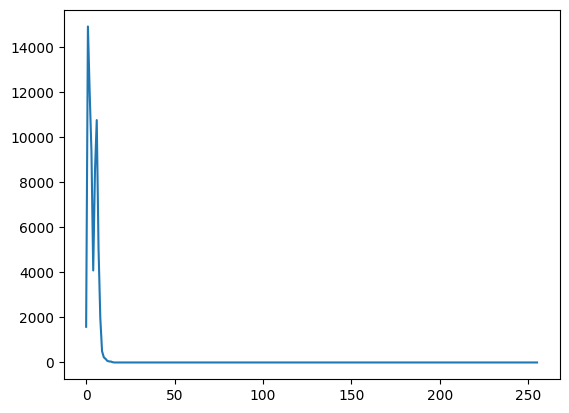

In [31]:
histogram = cv2.calcHist([yeni_I],[0],None,[256],[0,256])
plt.plot(histogram)


2D Convolution ( Image Filtering)


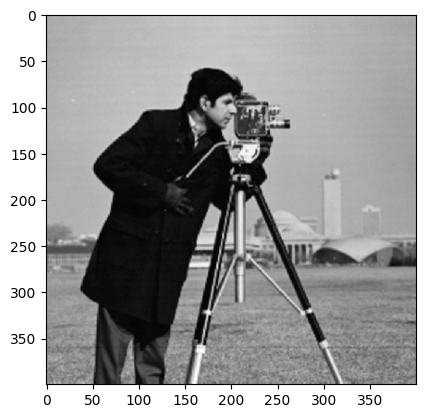

In [66]:
image = cv2.imread("s_cameraman.png")
plt.imshow(image)

In [67]:
h = np.ones((3,3), np.float32)/25
h

array([[0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04]], dtype=float32)

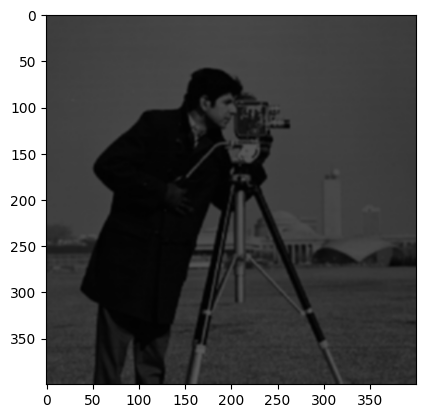

In [68]:
yeni_image = cv2.filter2D(image, -1 , h)
plt.imshow(yeni_image)


Créez une nouvelle image en appliquant un filtre moyen 3x3 à l'image

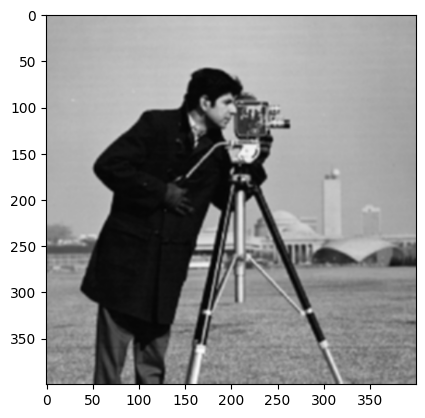

In [69]:
image = cv2.blur(image,(3,3))
plt.imshow(image)

Créez une nouvelle image en appliquant un filtre moyen 5x5 à l'image

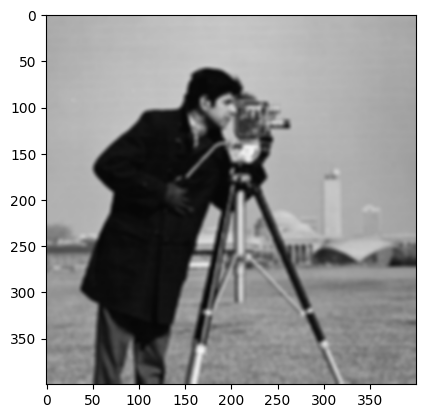

In [70]:
image = cv2.blur(image,(5,5))
plt.imshow(image)

Créez une nouvelle image en appliquant un filtre gaussien 5x5 à l'image

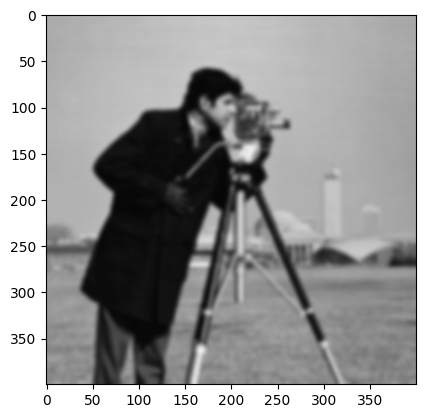

In [73]:
image = cv2.GaussianBlur(image,(5,5),0)
plt.imshow(image)

Créez deux nouvelles images en appliquant des filtres Sobel horizontaux et verticaux à l'image

In [ ]:
sobel_filter_v = np.array([[-1,-2,-1],
                         [0,0,0],
                         [1,2,1]])
print(sobel_filter)

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


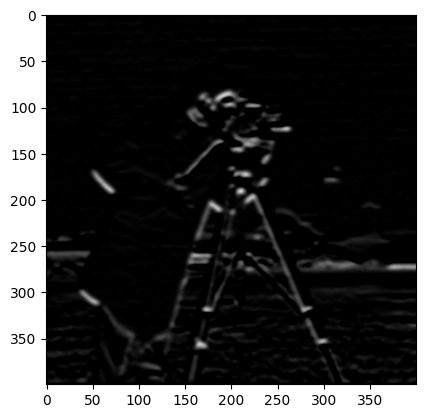

In [ ]:
sobel_ver = cv2.filter2D(image, -1, sobel_filter_v)
plt.imshow(sobel_ver)

In [82]:
sobel_filter_h = np.array([[-1,0,1],
                         [-2,0,2],
                         [-1,0,1]])
print(sobel_filter_h)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


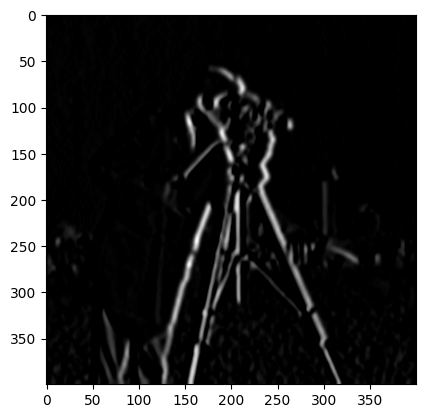

In [83]:
sobel_hor = cv2.filter2D(image, -1, sobel_filter_h)
plt.imshow(sobel_hor)

Créez une nouvelle image en appliquant un filtre Laplace à l'image

In [85]:
laplace_filter = np.array([[0,-1,0],
                         [-1,-4,-1],
                         [0,-1,0]])
print(laplace_filter)

[[ 0 -1  0]
 [-1 -4 -1]
 [ 0 -1  0]]


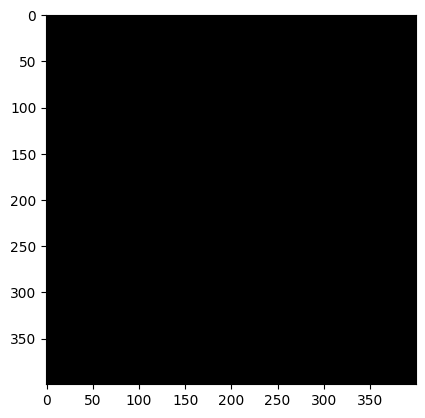

In [88]:
laplace = cv2.filter2D(image, -1, laplace_filter)
plt.imshow(laplace)

Créez une nouvelle image en appliquant Median Filter à l’image.

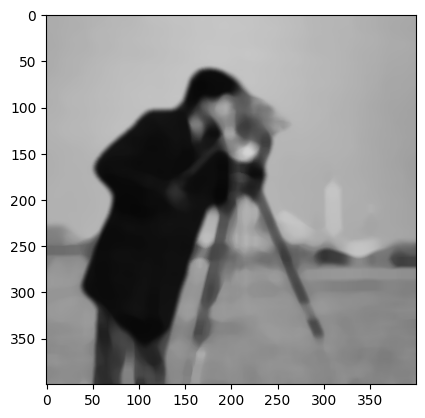

In [94]:
median_image = cv2.medianBlur(image, 17)
plt.imshow(median_image)


transformée de Fourier 

In [98]:
img_fourier = np.fft.fft2(image)
img_fourier = np.fft.fftshift(img_fourier)

In [99]:
g_image = np.abs(img_fourier)
g_image = np.log(g_image+1)
g_image = g_image/np.max(g_image)*255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


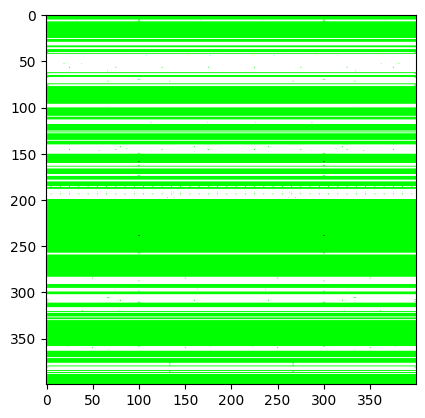

In [100]:
plt.imshow(g_image)